### Importing the Keras libraries and packages

In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D`
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [2]:
# Initialising the CNN
classifier = Sequential()

# CNN - 1
# Step 1 - Convolution Layer
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling Layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))


# Adding a second convolutional layer ( CNN - 2)
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening Layer 
classifier.add(Flatten())

# Step 4 - Full connection  ( Neural Netwokr)
classifier.add(Dense(units = 128, activation = 'relu'))   ## 1 HIDDEN LAYER WITH 128 NEURONS 
classifier.add(Dense(units = 1, activation = 'sigmoid'))  ## OUTPUT LAYER WITH 1 NUERONS # sigmoid = probability

In [3]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [4]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 21, 21, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 128)               4

In [5]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)  # max normilization
                                   

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r"C:\Users\roshan salunke\Downloads\archive (3)\casting_data\casting_data\train",
                                                 target_size = (64, 64),  # HEIGHT AND WIDTH
                                                 batch_size = 32, # take 32 group which pick image randomly without replacement
                                                 class_mode = 'binary') # binary because we have 2 type = cat / dogs

test_set = test_datagen.flow_from_directory(r"C:\Users\roshan salunke\Downloads\archive (3)\casting_data\casting_data\test",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [6]:
6633 /32  # each group will have 250 image unique

207.28125

In [7]:
training_set.class_indices

{'def_front': 0, 'ok_front': 1}

In [8]:
import warnings 
warnings.filterwarnings("ignore")

In [9]:
result=classifier.fit(training_set,
                         epochs=10, # iteration or repeat 
                         validation_data = test_set)

Epoch 1/10
208/208 [==============================] - 17s 77ms/step - loss: 0.6343 - accuracy: 0.6398 - val_loss: 0.5371 - val_accuracy: 0.7399
Epoch 2/10
208/208 [==============================] - 13s 62ms/step - loss: 0.5184 - accuracy: 0.7413 - val_loss: 0.4906 - val_accuracy: 0.7580
Epoch 3/10
208/208 [==============================] - 13s 61ms/step - loss: 0.4144 - accuracy: 0.8055 - val_loss: 0.3632 - val_accuracy: 0.8462
Epoch 4/10
208/208 [==============================] - 13s 61ms/step - loss: 0.3378 - accuracy: 0.8517 - val_loss: 0.3096 - val_accuracy: 0.8643
Epoch 5/10
208/208 [==============================] - 13s 60ms/step - loss: 0.3021 - accuracy: 0.8670 - val_loss: 0.2781 - val_accuracy: 0.8783
Epoch 6/10
208/208 [==============================] - 13s 61ms/step - loss: 0.2873 - accuracy: 0.8725 - val_loss: 0.2844 - val_accuracy: 0.8657
Epoch 7/10
208/208 [==============================] - 13s 60ms/step - loss: 0.2426 - accuracy: 0.8969 - val_loss: 0.2738 - val_accuracy:

In [10]:
classifier.save('casting_classifier.h5')

In [11]:
from tensorflow.keras.preprocessing import image

In [12]:
from  keras.models import load_model
#from keras.preprocessing import image
import numpy as np
import cv2   #pip install opencv-python
import matplotlib.pyplot as plt 
%matplotlib inline

In [13]:
model=load_model("casting_classifier.h5")

In [20]:
def model_output (path):
    raw_img = image.load_img(path,target_size=(64,64))  # data import 7 convert image into height= 64 , width = 64 
    raw_img = image.img_to_array(raw_img) # convert image to array 
    raw_img = np.expand_dims(raw_img, axis=0)
    raw_img = raw_img/255                     # data max normalization
    Probability = model.predict(raw_img)[0][0]  # probability
    plt.imshow(cv2.imread(path))
    print('Probability',Probability)
    if Probability > 0.5:
        print("It's a ok_front")
    else:
        print("its a def_front")

In [21]:
import os 
os.chdir(r"C:\Users\roshan salunke\Downloads\archive (3)")

1/1 [==============================] - 0s 24ms/step
Probability 0.93892187
It's a ok_front


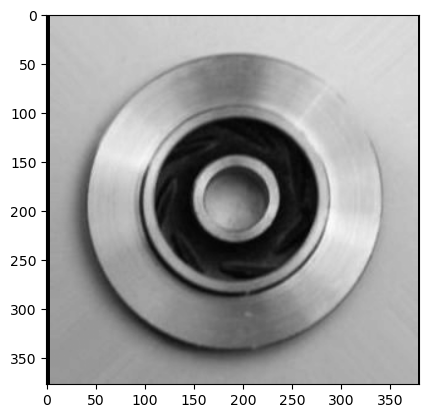

In [22]:
model_output("Screenshot 2023-04-26 012301.png")

1/1 [==============================] - 0s 21ms/step
Probability 0.95764565
It's a ok_front


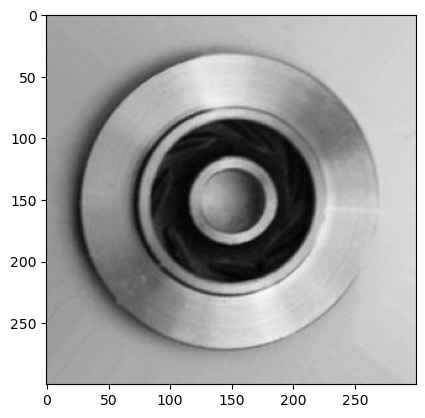

In [23]:
model_output("cast_ok_0_9957.jpeg")

1/1 [==============================] - 0s 22ms/step
Probability 0.9981966
It's a ok_front


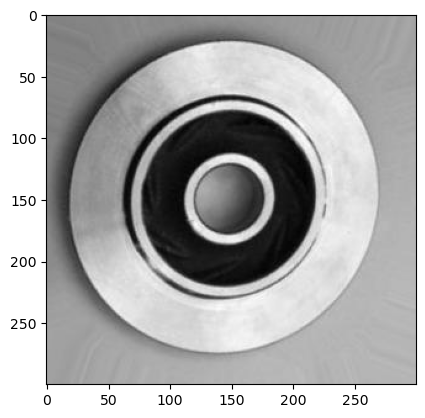

In [24]:
model_output("cast_ok_0_9945.jpeg")

1/1 [==============================] - 0s 21ms/step
Probability 0.19974773
its a def_front


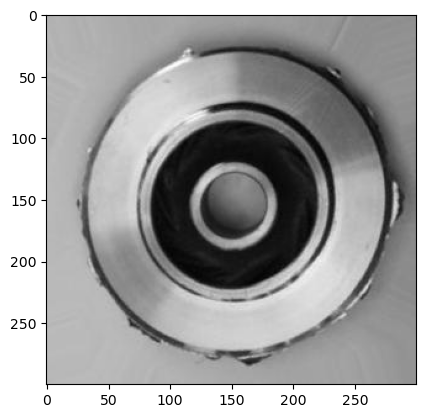

In [25]:
model_output("cast_def_0_9935.jpeg")

1/1 [==============================] - 0s 22ms/step
Probability 0.00021900164
its a def_front


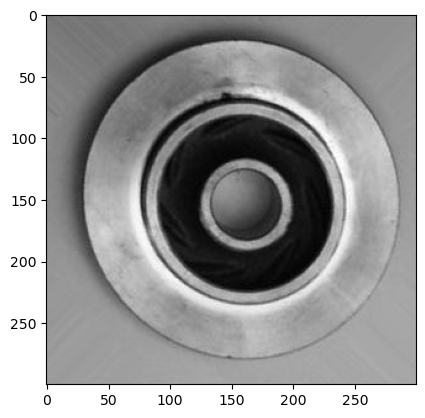

In [30]:
model_output("cast_def_0_9963.jpeg")

1/1 [==============================] - 0s 24ms/step
Probability 0.99949944
It's a ok_front


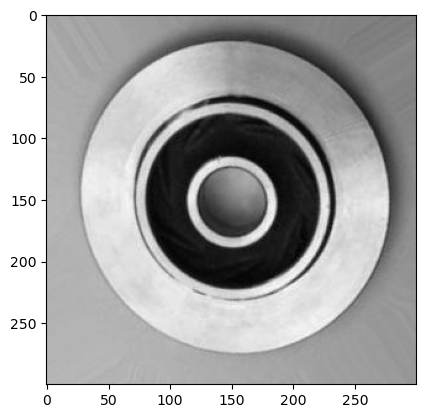

In [32]:
model_output("cast_ok_0_9995.jpeg")

1/1 [==============================] - 0s 21ms/step
Probability 0.9978795
It's a ok_front


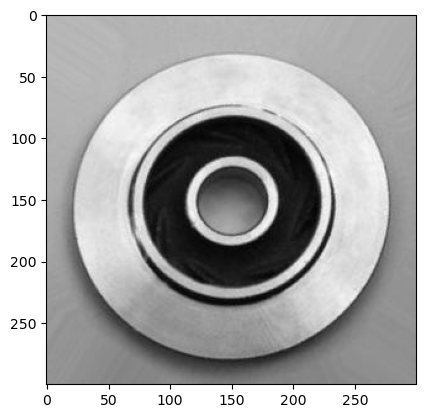

In [34]:
model_output("cast_ok_0_9978.jpeg")

## Conclusion

In this project, we developed a Convolutional Neural Network (CNN) model for Metal Casting image classification. The model was trained on a large dataset of images and achieved an accuracy of 92% on the test set.

This project demonstrates the importance of deep learning in image classification tasks and highlights the potential of metal casting image classification for the manufacturing industry. Future work can involve incorporating additional features such as image segmentation and object detection to further improve the accuracy of the model